In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 16)

# Read the CSV file
df = pd.read_csv('outputs/bot_detection_kpis.csv', 
                 encoding='utf-8',
                 engine='python',
                 on_bad_lines='skip',
                 skipinitialspace=True)

print(f"Successfully loaded {len(df)} rows")
print(f"Columns: {list(df.columns)}")
print("\n")

# Clean the data - filter out rows with missing node_type
df_clean = df[df['NodeType'].notna()].copy()

Successfully loaded 95 rows
Columns: ['NodeID', 'Username', 'NodeType', 'NetworkType', 'TxPackets', 'RxPackets', 'LostPackets', 'PacketLossRate', 'TotalBytes', 'TweetCount', 'StormTweetCount', 'AvgIAT_s', 'StdIAT_s', 'PlannedWifiPkts', 'Planned5GPkts', 'AvgDelay_ms', 'AvgJitter_ms', 'Throughput_bps', 'TotalDistance_m']




In [61]:
metrics = {
    'PacketLossRate': 'Packet Loss Rate',
    'AvgDelay_ms': 'Average Delay (ms)',
    'AvgJitter_ms': 'Average Jitter (ms)',
    'Throughput_bps': 'Throughput (bps)',
    'AvgIAT_s': 'Avg Inter-Arrival Time (s)',
    'TxPackets': 'Transmitted Packets',
    'RxPackets': 'Received Packets',
    'TotalDistance_m': 'Total Distance (m)'
}

comparison_stats = []
for metric, label in metrics.items():
    bot_data = df_clean[df_clean['NodeType'] == 'bot'][metric].dropna()
    human_data = df_clean[df_clean['NodeType'] == 'human'][metric].dropna()
    
    if len(bot_data) > 0 and len(human_data) > 0:
        bot_mean = bot_data.mean()
        human_mean = human_data.mean()
        diff_pct = ((human_mean - bot_mean) / bot_mean * 100) if bot_mean != 0 else 0
        
        comparison_stats.append({
            'Metric': label,
            'Bot Mean': f"{bot_mean:.2f}",
            'Human Mean': f"{human_mean:.2f}",
            'Bot Median': f"{bot_data.median():.2f}",
            'Human Median': f"{human_data.median():.2f}",
            'Difference': f"{diff_pct:+.1f}%"
        })

stats_df = pd.DataFrame(comparison_stats)

In [62]:
bot_df = df_clean[df_clean['NodeType'] == 'bot']
human_df = df_clean[df_clean['NodeType'] == 'human']

/tmp/ipykernel_10819/1027598974.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot([bot_loss, human_loss], labels=['Bot', 'Human'], patch_artist=True)


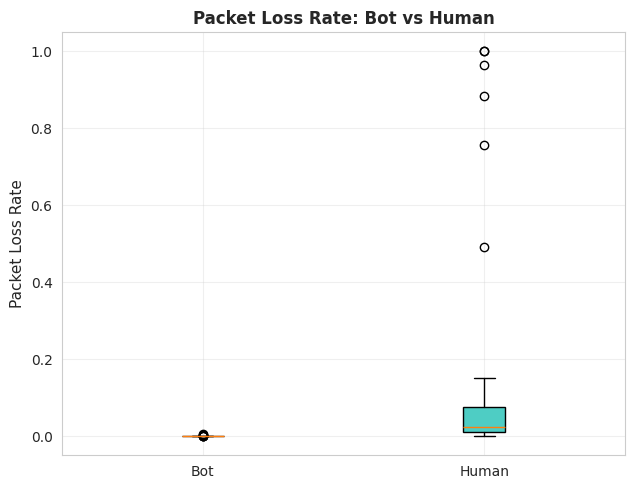

In [63]:
plt.figure(figsize=(18, 14))
ax1 = plt.subplot(3, 3, 1)
bot_loss = bot_df['PacketLossRate'].dropna()
human_loss = human_df['PacketLossRate'].dropna()
bp = ax1.boxplot([bot_loss, human_loss], labels=['Bot', 'Human'], patch_artist=True)
bp['boxes'][0].set_facecolor('#ff6b6b')
bp['boxes'][1].set_facecolor('#4ecdc4')
ax1.set_ylabel('Packet Loss Rate', fontsize=11)
ax1.set_title('Packet Loss Rate: Bot vs Human', fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('packet_loss_rate_bot_vs_human.png', dpi=150, bbox_inches='tight')
plt.show()

/tmp/ipykernel_10819/3613099906.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot([bot_delay, human_delay], labels=['Bot', 'Human'], patch_artist=True)


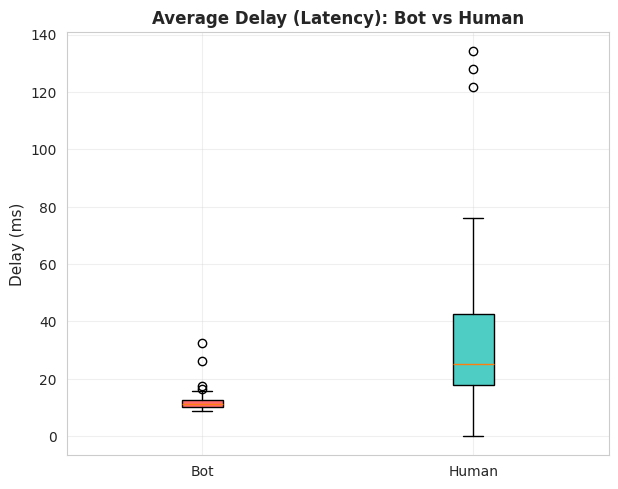

In [64]:

plt.figure(figsize=(18, 14))
ax2 = plt.subplot(3, 3, 2)
bot_delay = bot_df['AvgDelay_ms'].dropna()
human_delay = human_df['AvgDelay_ms'].dropna()
bp = ax2.boxplot([bot_delay, human_delay], labels=['Bot', 'Human'], patch_artist=True)
bp['boxes'][0].set_facecolor('#ff6b6b')
bp['boxes'][1].set_facecolor('#4ecdc4')
ax2.set_ylabel('Delay (ms)', fontsize=11)
ax2.set_title('Average Delay (Latency): Bot vs Human', fontweight='bold', fontsize=12)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('average_delay_bot_vs_human.png', dpi=150, bbox_inches='tight')
plt.show()

/tmp/ipykernel_10819/77170191.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot([bot_throughput, human_throughput], labels=['Bot', 'Human'], patch_artist=True)


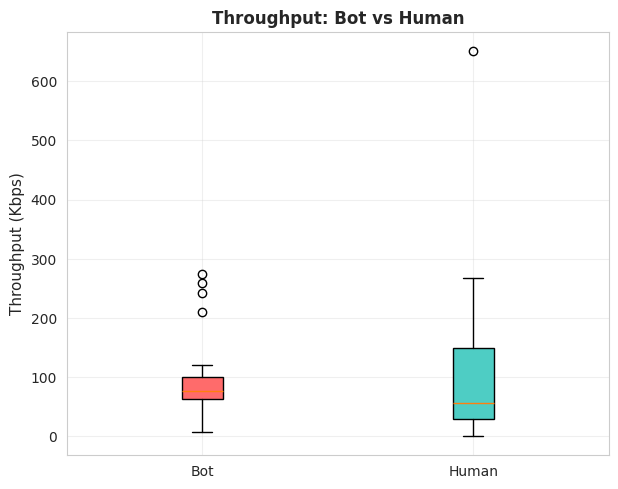

In [65]:
plt.figure(figsize=(18, 14))
ax3 = plt.subplot(3, 3, 3)
bot_throughput = bot_df['Throughput_bps'].dropna() / 1000  # Convert to Kbps
human_throughput = human_df['Throughput_bps'].dropna() / 1000
bp = ax3.boxplot([bot_throughput, human_throughput], labels=['Bot', 'Human'], patch_artist=True)
bp['boxes'][0].set_facecolor('#ff6b6b')
bp['boxes'][1].set_facecolor('#4ecdc4')
ax3.set_ylabel('Throughput (Kbps)', fontsize=11)
ax3.set_title('Throughput: Bot vs Human', fontweight='bold', fontsize=12)
ax3.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('throughput_bot_vs_human.png', dpi=150, bbox_inches='tight')
plt.show()

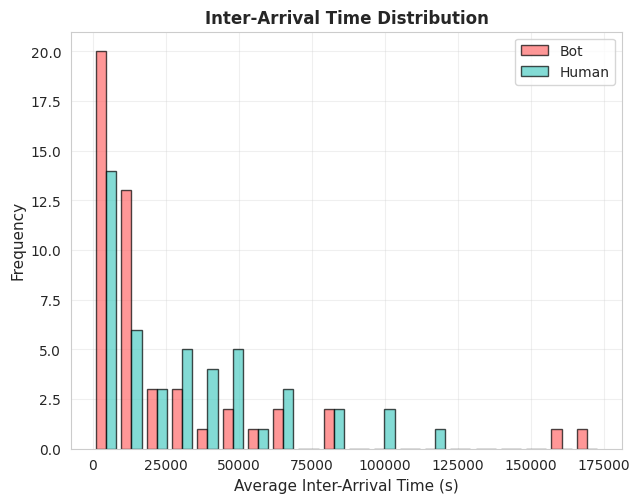

In [66]:

plt.figure(figsize=(18, 14))
ax4 = plt.subplot(3, 3, 4)
bot_iat = bot_df['AvgIAT_s'].dropna()
human_iat = human_df['AvgIAT_s'].dropna()
ax4.hist([bot_iat, human_iat], bins=20, label=['Bot', 'Human'], 
         color=['#ff6b6b', '#4ecdc4'], alpha=0.7, edgecolor='black')
ax4.set_xlabel('Average Inter-Arrival Time (s)', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.set_title('Inter-Arrival Time Distribution', fontweight='bold', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('iat_distribution_bot_vs_human.png', dpi=150, bbox_inches='tight')
plt.show()  

Inter-arrival time is the time between the tweets. Bots have smaller inter-arrival times because the send more tweets/spam

In [ ]:
plt.figure(figsize=(18, 14))
ax5 = plt.subplot(3, 3, 5)
bot_tx = bot_df['TxPackets'].dropna()
bot_rx = bot_df['RxPackets'].dropna()
human_tx = human_df['TxPackets'].dropna()
human_rx = human_df['RxPackets'].dropna()
x = np.arange(2)
width = 0.35
ax5.bar(x - width/2, [bot_tx.mean(), human_tx.mean()], width, label='Transmitted', color='#ff9999')
ax5.bar(x + width/2, [bot_rx.mean(), human_rx.mean()], width, label='Received', color='#99ccff')
ax5.set_ylabel('Average Packet Count', fontsize=11)
ax5.set_title('Transmitted vs Received Packets', fontweight='bold', fontsize=12)
ax5.set_xticks(x)
ax5.set_xticklabels(['Bot', 'Human'])
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('tx_rx_packets_bot_vs_human.png', dpi=150, bbox_inches='tight')
plt.show()  

In [ ]:

plt.figure(figsize=(18, 14))
ax6 = plt.subplot(3, 3, 6)
bot_jitter = bot_df['AvgJitter_ms'].dropna()
human_jitter = human_df['AvgJitter_ms'].dropna()
bp = ax6.boxplot([bot_jitter, human_jitter], labels=['Bot', 'Human'], patch_artist=True)
bp['boxes'][0].set_facecolor('#ff6b6b')
bp['boxes'][1].set_facecolor('#4ecdc4')
ax6.set_ylabel('Jitter (ms)', fontsize=11)
ax6.set_title('Average Jitter: Bot vs Human', fontweight='bold', fontsize=12)
ax6.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('average_jitter_bot_vs_human.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(18, 14))
ax7 = plt.subplot(3, 3, 7)
bot_distance = bot_df['TotalDistance_m'].dropna()
human_distance = human_df['TotalDistance_m'].dropna()
bp = ax7.boxplot([bot_distance, human_distance], labels=['Bot', 'Human'], patch_artist=True)
bp['boxes'][0].set_facecolor('#ff6b6b')
bp['boxes'][1].set_facecolor('#4ecdc4')
ax7.set_ylabel('Distance (meters)', fontsize=11)
ax7.set_title('Total Distance Traveled (Mobility)', fontweight='bold', fontsize=12)
ax7.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('total_distance_bot_vs_human.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(18, 14))

ax8 = plt.subplot(3, 3, 8)
ax8.scatter(bot_df['PacketLossRate'], bot_df['Throughput_bps']/1000, 
           c='#ff6b6b', label='Bot', alpha=0.6, s=100, edgecolors='black')
ax8.scatter(human_df['PacketLossRate'], human_df['Throughput_bps']/1000, 
           c='#4ecdc4', label='Human', alpha=0.6, s=100, edgecolors='black')
ax8.set_xlabel('Packet Loss Rate', fontsize=11)
ax8.set_ylabel('Throughput (Kbps)', fontsize=11)
ax8.set_title('Packet Loss vs Throughput', fontweight='bold', fontsize=12)
ax8.legend()
ax8.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('packet_loss_vs_throughput_bot_vs_human.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(18, 14))

ax9 = plt.subplot(3, 3, 9)
bot_wifi = bot_df['PlannedWifiPkts'].sum()
human_wifi = human_df['PlannedWifiPkts'].sum()
human_5g = human_df['Planned5GPkts'].sum()

categories = ['Bot\n(WiFi)', 'Human\n(WiFi)', 'Human\n(5G)']
values = [bot_wifi, human_wifi, human_5g]
colors = ['#ff6b6b', '#4ecdc4', '#95e1d3']
bars = ax9.bar(categories, values, color=colors, edgecolor='black', linewidth=1.5)
ax9.set_ylabel('Total Packets', fontsize=11)
ax9.set_title('Network Type Usage', fontweight='bold', fontsize=12)
ax9.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax9.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig('network_type_usage_bot_vs_human.png', dpi=150, bbox_inches='tight')
plt.show()